<a href="https://colab.research.google.com/github/Patriciangugi/dsc-type-1-and-2-error-lab/blob/master/Type_I_and_Type_II_Errors_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import random

import seaborn as sns
sns.set(color_codes=True)

<ipython-input-2-b9450ea45d53>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pop)


<Axes: ylabel='Density'>

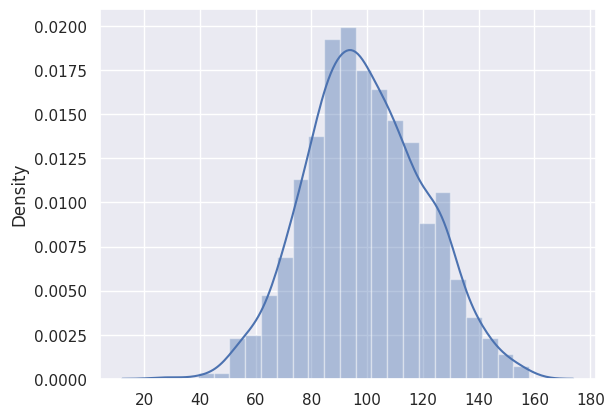

In [2]:
# Create a population with mean=100 and sd=20 and size = 1000
pop = np.random.normal(100, 20, 1000)
pop.dtype
sns.distplot(pop)

In [3]:
k = 100
sample1 = np.random.choice(pop,100,replace=True)

print ("Sample 1 Summary")
stats.describe(sample1)

Sample 1 Summary


DescribeResult(nobs=100, minmax=(44.84912681973383, 151.36683417117737), mean=99.32079769404987, variance=481.7364745812032, skewness=-0.040653385762864175, kurtosis=-0.4216182587657804)

In [4]:
sample2 = np.random.choice(pop,100,replace=True)
print ("Sample 2 Summary")
stats.describe(sample2)

Sample 2 Summary


DescribeResult(nobs=100, minmax=(55.695483830929014, 152.16628127720833), mean=98.2994845334346, variance=379.9495142926119, skewness=0.3078036665550435, kurtosis=-0.11147156129159663)

In [5]:
# test the sample means
stats.ttest_ind(sample1, sample2)

TtestResult(statistic=0.3479240199682154, pvalue=0.7282668484325197, df=198.0)

<ipython-input-6-9f3f09cc543a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample1, label='Sample1')
<ipython-input-6-9f3f09cc543a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample2, label='Sample2')


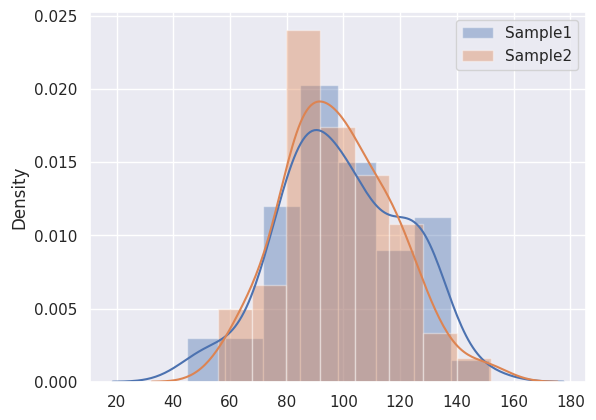

In [6]:
plt.figure("Test Samples")
sns.distplot(sample1, label='Sample1')
sns.distplot(sample2, label='Sample2')
plt.legend()
plt.show()


In [7]:
def type_1_error(population, num_tests, alpha_set):
    """
    Simulate Type I errors by performing multiple hypothesis tests on random samples
    drawn from the same population.

    Parameters
    ----------
    population: ndarray
        A random normal distribution.
    num_tests: int
        The number of hypothesis tests to be computed.
    alpha_set: list
        List of alpha levels to test.

    Returns
    ----------
    sig_tests : DataFrame
        A dataframe containing the columns 'type_1_error', 'p_value', and 'alpha'.
    """
    results = []

    for alpha in alpha_set:
        for _ in range(num_tests):
            # Draw two random samples from the population
            sample1 = np.random.choice(population, size=len(population)//2, replace=False)
            sample2 = np.random.choice(population, size=len(population)//2, replace=False)

            # Perform an independent t-test
            t_stat, p_value = stats.ttest_ind(sample1, sample2)

            # Check if the null hypothesis is rejected
            type_1_error_occurred = p_value < alpha

            # Store results
            results.append({
                'type_1_error': type_1_error_occurred,
                'p_value': p_value,
                'alpha': alpha
            })

    # Create a DataFrame from the results
    sig_tests = pd.DataFrame(results)

    return sig_tests

# Example usage:
# Create a population distribution
np.random.seed(42)  # For reproducibility
population = np.random.normal(100, 20, 1000)

# Specify the number of hypothesis tests
num_tests = 1000

# Create a list of alphas
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]

# Run the simulation
sig_tests = type_1_error(population, num_tests, alpha_set)

# Display the first few rows of the result
print(sig_tests.head())

   type_1_error   p_value  alpha
0         False  0.925400  0.001
1         False  0.572792  0.001
2         False  0.675743  0.001
3         False  0.647213  0.001
4         False  0.155328  0.001


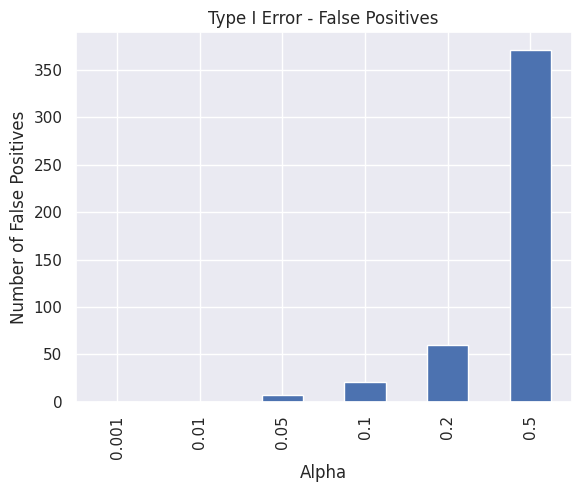

In [8]:
pop = np.random.normal(100, 20, 1000)
num_tests = 1000
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]

# Run the simulation
sig_tests_1 = type_1_error(pop, num_tests, alpha_set)

# Group by alpha and sum the Type I errors
group_error = sig_tests_1.groupby('alpha')['type_1_error'].sum()

# Plot the results
group_error.plot.bar(title="Type I Error - False Positives", xlabel="Alpha", ylabel="Number of False Positives")
plt.show()

In [9]:
def type_2_error(population, population_2, num_tests, alpha_set):
    """
    Simulate Type II errors by performing multiple hypothesis tests on random samples
    drawn from two different populations.

    Parameters
    ----------
    population: ndarray
        A random normal distribution.
    population_2: ndarray
        A different random normal distribution.
    num_tests: int
        The number of hypothesis tests to be computed.
    alpha_set: list
        List of alpha levels to test.

    Returns
    ----------
    sig_tests : DataFrame
        A dataframe containing the columns 'type_2_error', 'p_value', and 'alpha'.
    """
    results = []

    for alpha in alpha_set:
        for _ in range(num_tests):
            # Draw two random samples from each population
            sample1 = np.random.choice(population, size=len(population)//2, replace=False)
            sample2 = np.random.choice(population_2, size=len(population_2)//2, replace=False)

            # Perform an independent t-test
            t_stat, p_value = stats.ttest_ind(sample1, sample2)

            # Check if the null hypothesis is rejected
            type_2_error_occurred = p_value >= alpha

            # Store results
            results.append({
                'type_2_error': type_2_error_occurred,
                'p_value': p_value,
                'alpha': alpha
            })

    # Create a DataFrame from the results
    sig_tests = pd.DataFrame(results)

    return sig_tests

# Example usage:
# Create population distributions
np.random.seed(42)  # For reproducibility
population = np.random.normal(100, 20, 1000)
population_2 = np.random.normal(110, 20, 1000)

# Specify the number of hypothesis tests
num_tests = 1000

# Create a list of alphas
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]

# Run the simulation
sig_tests_2 = type_2_error(population, population_2, num_tests, alpha_set)

# Display the first few rows of the result
print(sig_tests_2.head())


   type_2_error       p_value  alpha
0         False  5.041261e-21  0.001
1         False  2.574521e-16  0.001
2         False  9.955125e-21  0.001
3         False  8.388277e-17  0.001
4         False  3.021580e-22  0.001


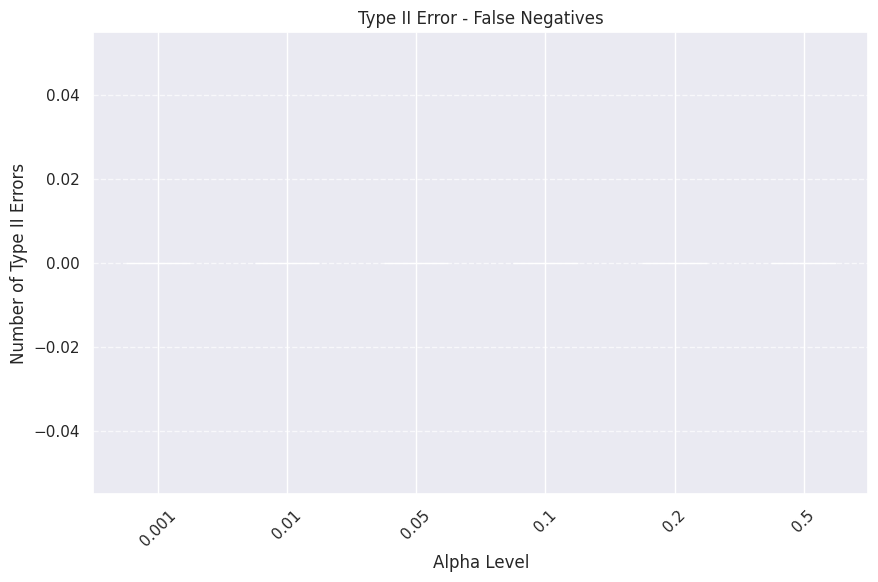

In [10]:
pop = np.random.normal(100, 20, 1000)       # Population 1
pop2 = np.random.normal(110, 20, 1000)      # Population 2
num_tests = 1000                            # Number of tests
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]  # List of alpha levels

# Run the simulation
sig_tests_2 = type_2_error(pop, pop2, num_tests, alpha_set)

# Group by alpha and sum the Type II errors
group_error2 = sig_tests_2.groupby('alpha')['type_2_error'].sum()

# Plot the results
plt.figure(figsize=(10, 6))
group_error2.plot(kind='bar', color='skyblue')
plt.title("Type II Error - False Negatives")
plt.xlabel("Alpha Level")
plt.ylabel("Number of Type II Errors")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()